# Introduction

## Preliminary Information

Cardiovascular diseases (CVDs) are the **number 1 cause of death globally**, taking an estimated 17.9 million lives each year, which accounts for **31% of all deaths worlwide**.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need **early detection** and management wherein a machine learning model can be of great help. 

[https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)



## About The Data

| Column | Units | Description |
|---|---|---|
| Anaemia | Boolean | Indicates decrease of red blood cells or hemoglobin. |
| Creatinine Phosphokinase | mcg/L | It is an enzyme present in the heart, whose elevated levels in the bloodstream indicate muscle or cardiac damage. |
| Diabetes | Boolean | It is a chronic medical condition characterized by elevated blood sugar levels resulting from insufficient insulin production or the body's inability to effectively use insulin. |
| Ejection Fraction | Percentage | It is a measure of the percentage of blood that the heart's left ventricle pumps out with each contraction, providing an assessment of the heart's pumping efficiency; a lower EF may indicate heart dysfunction or failure. |
| Blood Pressure | Boolean | Blood pressure is the force exerted by circulating blood against the walls of arteries. |
| Platelets | kiloplatelets/mL | platelets help prevent excessive bleeding by forming blood clots at the site of vascular injury. |
| Serum Creatinine | mg/dL | Serum creatinine is a waste product generated by muscle metabolism that is filtered out of the blood by the kidneys. |
| Serum Sodium | mEq/L | Serum sodium refers to the concentration of sodium ions in the liquid component of blood. |
| Sex | Binary (0 for women, 1 for men) | The sex of the patient. |
| Smoking | Boolean | If the patient smokes actively or ever did in past. |
| Time | Time in months | It is the time of the patient's follow-up visit for the disease in months. |

## Packages and Dependencies

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import tensorflow as tf

## Color Palette

In [101]:
light_gray_1 = "#E5E5E5" 
pink = "#EB84AC"
red = "#f12215"
blue = "#15e4f1"
cmap = "coolwarm"

# Data Preparation

## Load our data

In [102]:
df = pd.read_csv("Data/heart_failure_clinical_records_dataset.csv")

In [103]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Data Cleaning

In [105]:
# Cleaning the data: removing blank lines and null values

# Checking for null values in the dataset
null_values = df.isnull().sum()
null_values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [106]:
# Checking if there are any blank lines (all values are NaN)
blank_lines = df.isna().all(axis = 1).sum()
blank_lines

0

In [107]:
# Removing any rows with null values
df_cleaned = df.dropna()

In [108]:

# Displaying the null value count and blank line count, and the first few rows of the cleaned dataframe
null_values, blank_lines, df_cleaned.head()

(age                         0
 anaemia                     0
 creatinine_phosphokinase    0
 diabetes                    0
 ejection_fraction           0
 high_blood_pressure         0
 platelets                   0
 serum_creatinine            0
 serum_sodium                0
 sex                         0
 smoking                     0
 time                        0
 DEATH_EVENT                 0
 dtype: int64,
 0,
     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
 0  75.0        0                       582         0                 20   
 1  55.0        0                      7861         0                 38   
 2  65.0        0                       146         0                 20   
 3  50.0        1                       111         0                 20   
 4  65.0        1                       160         1                 20   
 
    high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
 0                    1  265000.00           

In [109]:
df_cleaned = df_cleaned.rename(columns={'DEATH_EVENT': 'death_event'})
df_cleaned.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Analysis

## The data

### Histogram

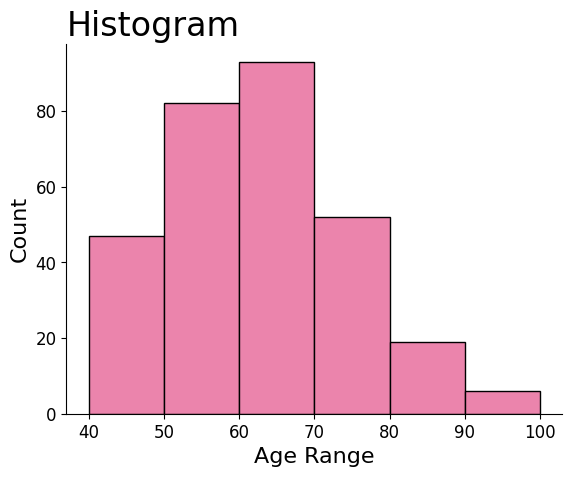

In [110]:
Figure1, Axes1 = plt.subplots()

Axes1.hist(df["age"],
           bins = [40, 50, 60, 70, 80, 90, 100],
           edgecolor = "black",
           color = pink )

# Theme for plot 
Axes1.spines["top"].set_visible(False)
Axes1.spines["right"].set_visible(False)
Axes1.yaxis.set_tick_params(labelsize = 12)
Axes1.xaxis.set_tick_params(labelsize = 12)

# 
plt.title(label = "Histogram",
          loc = "left",
          fontsize = 24)
plt.ylabel(ylabel = "Count",
           fontsize = 16)
plt.xlabel(xlabel = "Age Range",
           fontsize = 16)

plt.savefig(fname = "./Images/Figure1",
            dpi = 400)

plt.show()

## Correlation

In [111]:
# Finding correlation of our target column

df_cleaned.corrwith(df_cleaned['death_event']).abs().sort_values(ascending=False)

death_event                 1.000000
time                        0.526964
serum_creatinine            0.294278
ejection_fraction           0.268603
age                         0.253729
serum_sodium                0.195204
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
platelets                   0.049139
smoking                     0.012623
sex                         0.004316
diabetes                    0.001943
dtype: float64

In [112]:
# Data visualization of correlation

corr_matrix = df_cleaned.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
age,1.000000,0.088006,0.081584,0.101012,0.060098,0.093289,0.052354,0.159187,0.045966,0.065430,0.018668,0.224068,0.253729
anaemia,0.088006,1.000000,0.190741,0.012729,0.031557,0.038182,0.043786,0.052174,0.041882,0.094769,0.107290,0.141414,0.066270
creatinine_phosphokinase,0.081584,0.190741,1.000000,0.009639,0.044080,0.070590,0.024463,0.016408,0.059550,0.079791,0.002421,0.009346,0.062728
diabetes,0.101012,0.012729,0.009639,1.000000,0.004850,0.012732,0.092193,0.046975,0.089551,0.157730,0.147173,0.033726,0.001943
ejection_fraction,0.060098,0.031557,0.044080,0.004850,1.000000,0.024445,0.072177,0.011302,0.175902,0.148386,0.067315,0.041729,0.268603
high_blood_pressure,0.093289,0.038182,0.070590,0.012732,0.024445,1.000000,0.049963,0.004935,0.037109,0.104615,0.055711,0.196439,0.079351
platelets,0.052354,0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,0.041198,0.062125,0.125120,0.028234,0.010514,0.049139
serum_creatinine,0.159187,0.052174,0.016408,0.046975,0.011302,0.004935,0.041198,1.000000,0.189095,0.006970,0.027414,0.149315,0.294278
serum_sodium,0.045966,0.041882,0.059550,0.089551,0.175902,0.037109,0.062125,0.189095,1.000000,0.027566,0.004813,0.087640,0.195204
sex,0.065430,0.094769,0.079791,0.157730,0.148386,0.104615,0.125120,0.006970,0.027566,1.000000,0.445892,0.015608,0.004316


## Univariant Analysis

In [113]:
# Calculating total number of death events for each desease 

diabetic_death = ((df_cleaned["death_event"] == 1) & (df_cleaned["diabetes"] == 1)).sum()
smoker_death = ((df_cleaned["death_event"] == 1) & (df_cleaned["smoking"] == 1)).sum()
high_blood_pressure_death = ((df_cleaned["death_event"] == 1) & (df_cleaned["high_blood_pressure"] == 1)).sum()
male_death = ((df_cleaned["death_event"] == 1) & (df_cleaned["sex"] == 1)).sum()
female_deaths = ((df_cleaned["death_event"] == 1) & (df_cleaned["sex"] == 0)).sum()

death_counts_df = pd.DataFrame({
    'Diabetic_Death': [diabetic_death],
    'Smoker_Death': [smoker_death],
    'High_Blood_Pressure_Death': [high_blood_pressure_death],
    'Male_Death': [male_death],
    'Female_Deaths': [female_deaths]
})

# Display the resulting DataFrame
death_counts_df

,Diabetic_Death,Smoker_Death,High_Blood_Pressure_Death,Male_Death,Female_Deaths
0,40,30,39,62,34


       Conditions  Counts
0  Diabetic_Death      40
1    Smoker_Death      30
2   High_BP_Death      39


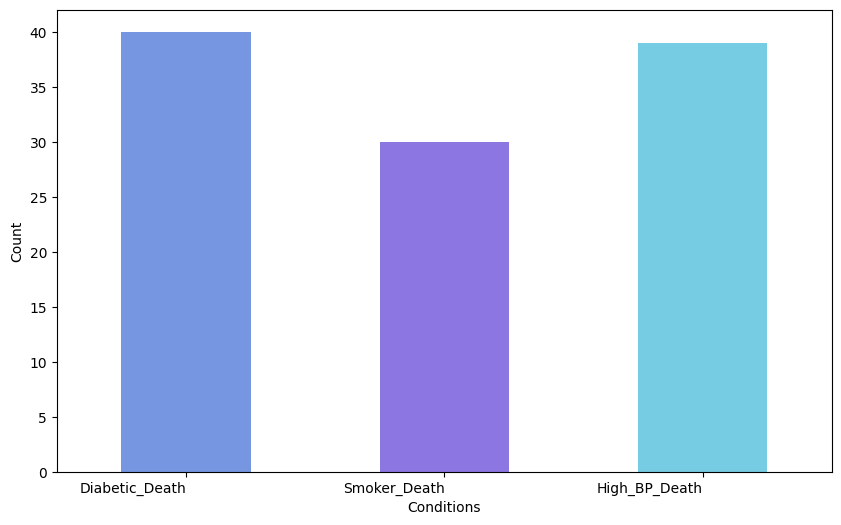

In [114]:
# Ploting bar chart for death_counts_df

counts_data = {
    'Conditions': ["Diabetic_Death", "Smoker_Death", "High_BP_Death"],
    'Counts': [40, 30, 39]
}

# Create a DataFrame
death_counts_df = pd.DataFrame(counts_data)

# Display the resulting DataFrame
print(death_counts_df)

# Plotting the bar chart
death_counts_df.plot(x='Conditions', y='Counts', kind='bar', legend=False, figsize=(10, 6),color=['#1b50cf', '#401bcf', '#1baacf'], alpha = 0.60)
plt.xlabel('Conditions')
plt.ylabel('Count')
plt.xticks(rotation= 0, ha='right')  
plt.show()

### Age and Creatinine Phosphokinase

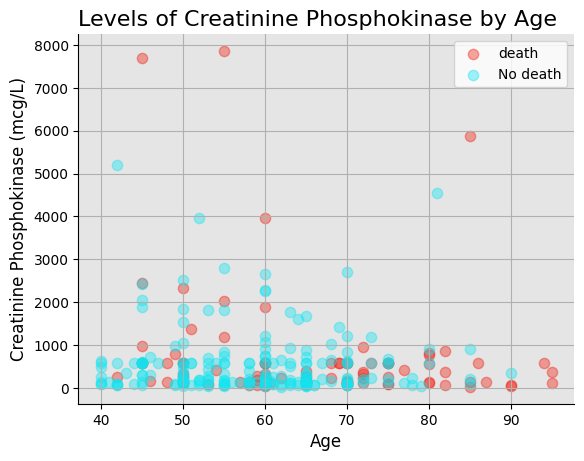

In [115]:
# Creating a scatter plot of Creatinine Phosphokinase levels by Age

Figure2, Axes2 = plt.subplots()

Axes2.scatter(df_cleaned[df_cleaned["death_event"] == 1]["age"],
              df_cleaned[df_cleaned["death_event"] == 1]["creatinine_phosphokinase"],
              s = 55,
              c = red,
              alpha = .4,
              label = "death")
Axes2.scatter(df_cleaned[df_cleaned["death_event"] == 0]["age"],
              df_cleaned[df_cleaned["death_event"] == 0]["creatinine_phosphokinase"],
              s = 55,
              c = blue,
              alpha = .4,
              label = "No death")
# Theme for plot 

Axes2.set_facecolor(light_gray_1)
Axes2.spines["top"].set_visible(False)
Axes2.spines["right"].set_visible(False)
Axes2.yaxis.set_tick_params(labelsize = 10)
Axes2.xaxis.set_tick_params(labelsize = 10)

# Title and labels
plt.title(label = "Levels of Creatinine Phosphokinase by Age",
          loc = "left",
        fontsize = 16)
plt.ylabel(ylabel = "Creatinine Phosphokinase (mcg/L)",
           fontsize = 12)
plt.xlabel(xlabel = "Age",
           fontsize = 12)
plt.grid()
plt.legend()

plt.savefig(fname = "./Images/Figure2",
            dpi = 400)

plt.show()

### Age and Serum Creatinine

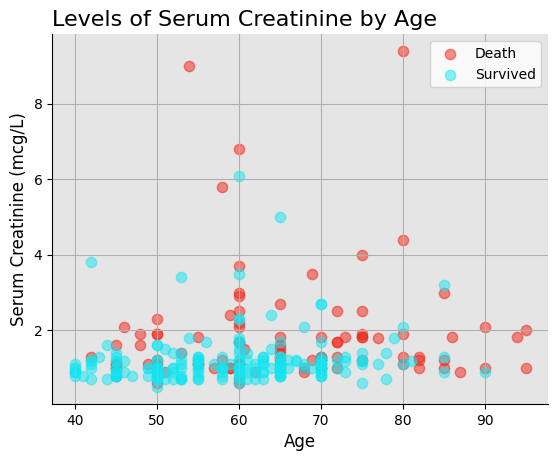

In [116]:
# Creating a scatter plot of serum creatinine levels by Age

Figure3, Axes3 = plt.subplots()

Axes3.scatter(df_cleaned[df_cleaned["death_event"] == 1]["age"],
              df_cleaned[df_cleaned["death_event"] == 1]["serum_creatinine"],
              s = 55,
              c = red,
              alpha = .5,
              label = "Death")
Axes3.scatter(df_cleaned[df_cleaned["death_event"] == 0]["age"],
              df_cleaned[df_cleaned["death_event"] == 0]["serum_creatinine"],
              s = 55,
              c = blue,
              alpha = .5,
              label = "Survived")

# Theme for plot 
Axes3.set_facecolor(light_gray_1)
Axes3.spines["top"].set_visible(False)
Axes3.spines["right"].set_visible(False)
Axes3.yaxis.set_tick_params(labelsize = 10)
Axes3.xaxis.set_tick_params(labelsize = 10)

# Title and labels
plt.title(label = "Levels of Serum Creatinine by Age",
          loc = "left",
        fontsize = 16)
plt.ylabel(ylabel = "Serum Creatinine (mcg/L)",
           fontsize = 12)
plt.xlabel(xlabel = "Age",
           fontsize = 12)
plt.grid()
plt.legend()

plt.savefig(fname = "./Images/Figure3",
            dpi = 400)

plt.show()

### Age and Serum Sodium

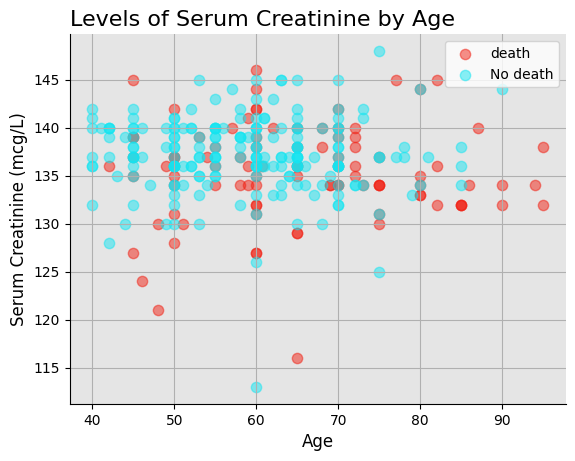

In [117]:
# Creating a scatter plot of serum creatinine levels by Age

Figure4, Axes4 = plt.subplots()

Axes4.scatter(df_cleaned[df_cleaned["death_event"] == 1]["age"],
              df_cleaned[df_cleaned["death_event"] == 1]["serum_sodium"],
              s = 55,
              c = red,
              alpha = .5,
              label = "death")
Axes4.scatter(df_cleaned[df_cleaned["death_event"] == 0]["age"],
              df_cleaned[df_cleaned["death_event"] == 0]["serum_sodium"],
              s = 55,
              c = blue,
              alpha = .5,
              label = "No death")
# Theme for plot 
Axes4.set_facecolor(light_gray_1)
Axes4.spines["top"].set_visible(False)
Axes4.spines["right"].set_visible(False)
Axes4.yaxis.set_tick_params(labelsize = 10)
Axes4.xaxis.set_tick_params(labelsize = 10)

# Title and labels
plt.title(label = "Levels of Serum Creatinine by Age",
          loc = "left",
        fontsize = 16)
plt.ylabel(ylabel = "Serum Creatinine (mcg/L)",
           fontsize = 12)
plt.xlabel(xlabel = "Age",
           fontsize = 12)
plt.grid()
plt.legend()

plt.savefig(fname = "./Images/Figure4",
            dpi = 400)

plt.show()

## Multivarient Analysis

### Mortality and Survival Among Smokers

In [118]:

# Calculating male smoker death events and survivors

male_smoker_death= ((df_cleaned["death_event"] == 1) & (df_cleaned["sex"] == 1) & (df_cleaned["smoking"] == 1)).sum()
male_smoker_survivors = ((df_cleaned["death_event"] == 0) & (df_cleaned["sex"] == 1) & (df_cleaned["smoking"] == 1)).sum()

# Calculating female smoker death events and survivors

female_smoker_death = ((df_cleaned["death_event"] == 1) & (df_cleaned["sex"] == 0) & (df_cleaned["smoking"] == 1)).sum()
female_smoker_survivors = ((df_cleaned["death_event"] == 0) & (df_cleaned["sex"] == 0) & (df_cleaned["smoking"] == 1)).sum()

# Creating a DataFrame to display the results

smoker_df = pd.DataFrame({
    'Male_Smoker_Death': [male_smoker_death],
    'Female_Smoker_Death': [female_smoker_death],
    'Male_Smoker_Survivors': [male_smoker_survivors],
    'Female_Smoker_Survivors': [female_smoker_survivors]
    
 
})
smoker_df

,Male_Smoker_Death,Female_Smoker_Death,Male_Smoker_Survivors,Female_Smoker_Survivors
0,27,3,65,1


In [119]:
# Create a DataFrame

df = pd.DataFrame({
    'Categories': ['Male Smoker Deaths', 'Female Smoker Deaths', 'Male Smoker Survivors', 'Female Smoker Survivors'],
    'Counts': [27, 3, 65, 1]
})

# Create a sunburst chart
fig = px.sunburst(df, path=['Categories'], values='Counts', color='Categories',
                  color_discrete_map={'Male Smoker Deaths': '#1baacf', 'Female Smoker Deaths':'red' ,
                                      'Male Smoker Survivors': '#1B50CF' , 'Female Smoker Survivors': '#cf9a1b'},
                  title='Male and Female Smoker Counts')

# Update layout for better presentation
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))

# Show the chart
fig.show()

### Mortality and Survival  Diabetes and High Blood Pressure Patients

In [120]:
# Multi variant analysis for patients who have diabetes as well as high blood pressure

diabetes_high_bp_deaths= ((df_cleaned["death_event"] == 1) & (df_cleaned["diabetes"] == 1) & (df_cleaned["high_blood_pressure"] == 1)).sum()

diabetes_high_bp_survivors= ((df_cleaned["death_event"] == 0) & (df_cleaned["diabetes"] == 1) & (df_cleaned["high_blood_pressure"] == 1)).sum()

diabetes_high_bp_df = pd.DataFrame({
    'Diabetes_High_BP_Deaths': [diabetes_high_bp_deaths],
    'Diabetes_High_BP_Survivors': [diabetes_high_bp_survivors]
    })
diabetes_high_bp_df

,Diabetes_High_BP_Deaths,Diabetes_High_BP_Survivors
0,17,26


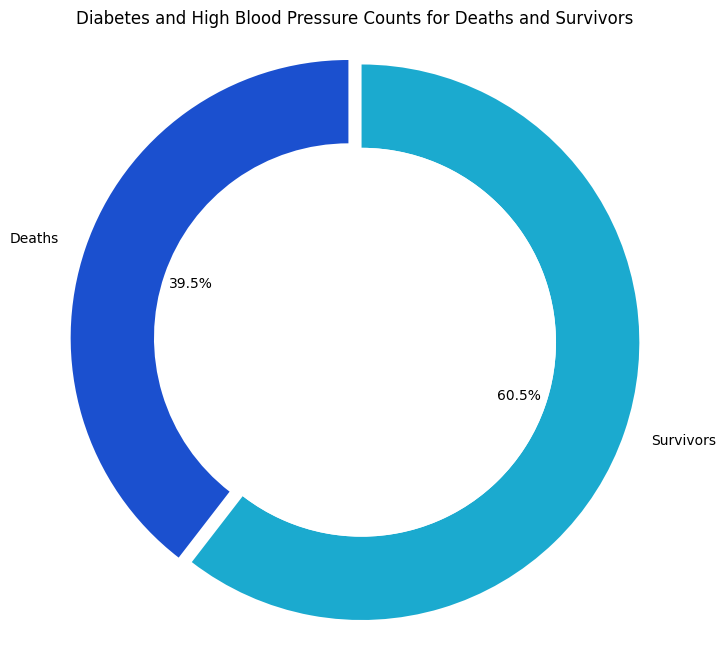

In [121]:
# ploting donut chart for diabetes_high_bp_df 

deaths = diabetes_high_bp_df['Diabetes_High_BP_Deaths']
survivors = diabetes_high_bp_df['Diabetes_High_BP_Survivors']

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie([deaths.sum(), survivors.sum()], labels=['Deaths', 'Survivors'], autopct='%1.1f%%', explode=[0.05, 0.0], startangle=90, wedgeprops=dict(width=0.3), colors=['#1B50CF', '#1baacf'])


# Draw a circle in the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle.
ax.axis('equal')  
plt.title('Diabetes and High Blood Pressure Counts for Deaths and Survivors')
plt.show()

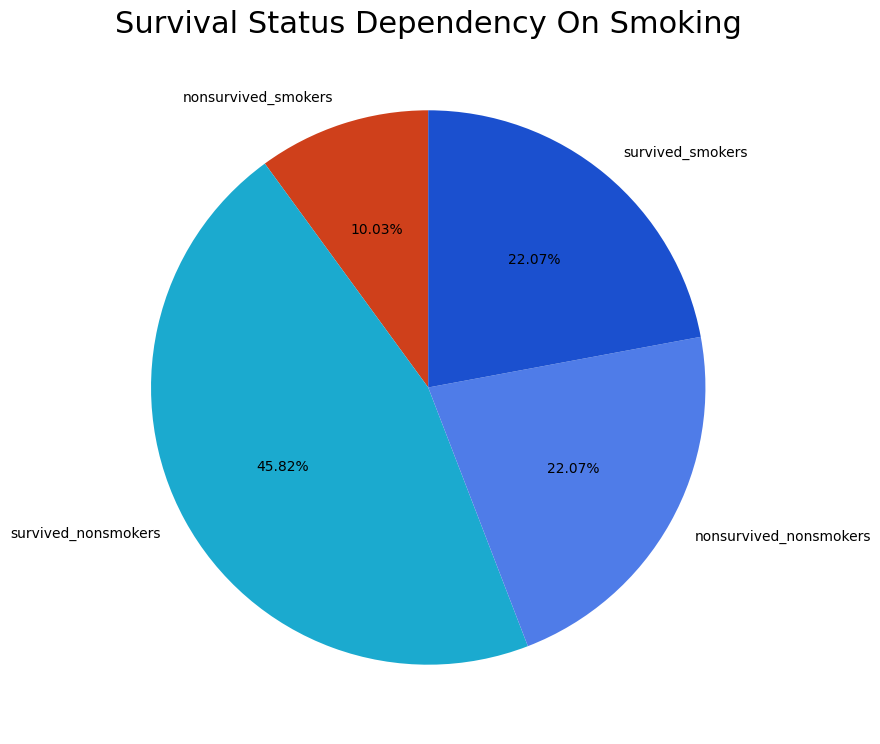

In [122]:


smokers = df_cleaned[df_cleaned["smoking"]==1]
non_smokers = df_cleaned[df_cleaned["smoking"]==0]
survived_smokers = smokers[smokers["death_event"]==0]
survived_nonsmokers = non_smokers[non_smokers["death_event"]==0]
nonsurvived_smokers = smokers[smokers["death_event"]==1]
nonsurvived_nonsmokers = non_smokers[non_smokers["death_event"]==1]

# Specify colors for each category
colors = ['#cf401b', '#1baacf', '#4f7ce8', '#1B50CF']

# Count data for the pie chart
smoking_data = [len(nonsurvived_smokers), len(survived_nonsmokers), len(nonsurvived_nonsmokers), len(survived_smokers)]
smoking_labels = ["nonsurvived_smokers", "survived_nonsmokers", "nonsurvived_nonsmokers", "survived_smokers"]

plt.figure(figsize=(9, 9))

# Specify colors for each slice
plt.pie(smoking_data, labels=smoking_labels, autopct='%.2f%%', startangle=90, colors=colors)

plt.title("Survival Status Dependency On Smoking", fontsize=22)
plt.show()








In [123]:
X=df_cleaned.copy()
X.drop("death_event", axis = 1, inplace = True)
y=df_cleaned["death_event"]

In [124]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [125]:
y=y.values.reshape(-1,1)

In [126]:
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [127]:

# Splitting the data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state = 2)

In [128]:
len(X_train)

209

In [129]:
# Data Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [130]:
# Accuracy List to store all the accuracy for later comparison
accuracy_list=[]

# Machine Learning

## Logistic Regression

In [131]:
import warnings
warnings.filterwarnings('ignore')

lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
lr_prediction = lr_model.predict(x_test_scaled)
lr_accuracy = (round(accuracy_score(lr_prediction, y_test),4)*100)
accuracy_list.append(lr_accuracy)
print(f"Logistic Regression Model accuracy = {lr_accuracy}")

Logistic Regression Model accuracy = 87.78


## Support Vector Machine

In [132]:
svc_model = SVC()
svc_model.fit(x_train_scaled, y_train)
svc_prediction = svc_model.predict(x_test_scaled)
svc_accuracy = (round(accuracy_score(svc_prediction, y_test), 4) * 100)
accuracy_list.append(svc_accuracy)
print(f"SVC model Accuracy = {svc_accuracy}")

SVC model Accuracy = 85.56


## KNearestNeighbor

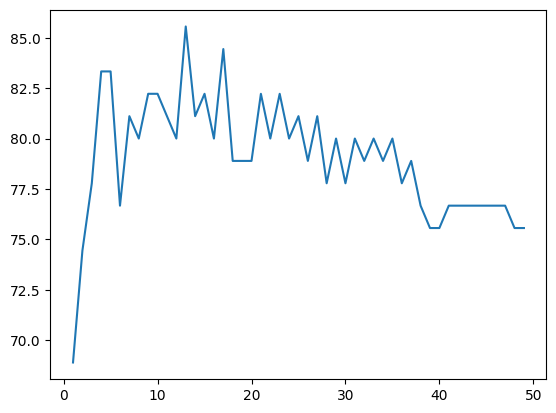

In [133]:
knn_list = []
for k in range(1, 50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train_scaled, y_train)
    knn_prediction=(knn_model.predict(x_test_scaled))
    knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100)
    knn_list.append(knn_accuracy)
k = np.arange(1,50)
plt.plot(k, knn_list)

In [134]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train_scaled, y_train)
knn_prediction = knn_model.predict(x_test_scaled)
knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4)*100)
accuracy_list.append(knn_accuracy)
print(f"KNeighbors model of accuracy = {knn_accuracy}")

KNeighbors model of accuracy = 76.67


## Decision Tree Classifier

In [135]:
dt_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 2)
dt_model.fit(x_train_scaled, y_train)
dt_prediction = dt_model.predict(x_test_scaled)
dt_accuracy = (round(accuracy_score(dt_prediction, y_test), 4) * 100)
accuracy_list.append(dt_accuracy)
print(f"Decision Tree Classifier Accuracy Score : {dt_accuracy}")

Decision Tree Classifier Accuracy Score : 88.89


## Random Forest Classifier

In [136]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
rf_prediction = rf_model.predict(x_test_scaled)
rf_accuracy = (round(accuracy_score(rf_prediction, y_test), 4) * 100)
accuracy_list.append(rf_accuracy)
print(f"Random Forest Classifier Accuracy Score : {rf_accuracy}")

Random Forest Classifier Accuracy Score : 91.11


In [137]:
print(f"Logistic Regression Accuracy : {lr_accuracy}, SVC Accuracy : {svc_accuracy}, KNearestNeighbors Accuracy : {knn_accuracy}, Decision Tree Accuracy : {dt_accuracy}, Random Forest Accuracy : {rf_accuracy}")

Logistic Regression Accuracy : 87.78, SVC Accuracy : 85.56, KNearestNeighbors Accuracy : 76.67, Decision Tree Accuracy : 88.89, Random Forest Accuracy : 91.11


In [138]:
models = ["Logistic Regression", "SVC", "KNearestNeighbors", "Decision Tree", "Random Forest"]

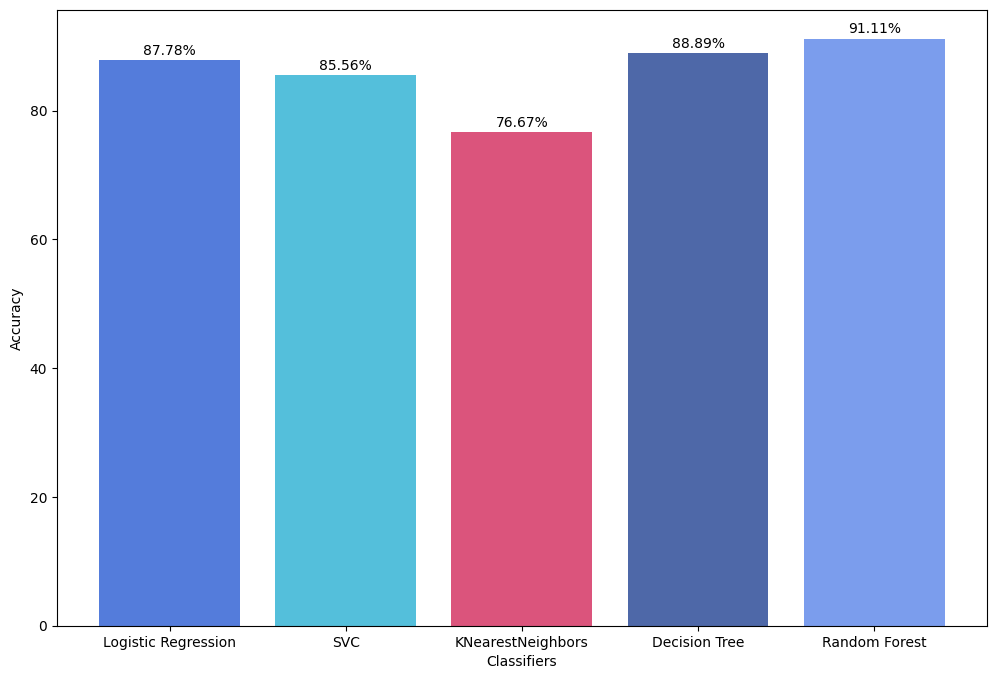

In [142]:
plt.figure(figsize=(12,8))
ax = plt.bar(models, accuracy_list, color=["#1B50CF", "#1baacf","#cf1b50", "#12368b", "#4f7ce8", "#12368b"], alpha=0.75)
plt.xlabel("Classifiers", fontsize = 10)
plt.ylabel("Accuracy", fontsize = 10)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    plt.annotate(f"{height}%", (x+width/2, y+ height*1.01), ha="center")
plt.show()

In [60]:
nn_model=tf.keras.models.Sequential()

In [53]:
nn_model.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=12))
nn_model.add(tf.keras.layers.Dense(units=6, activation="relu"))

In [54]:
#  Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [55]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 78        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 127 (508.00 Byte)
Trainable params: 127 (508.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
# compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [74]:
#  Fit the model to the training data
fit_model = nn_model.fit(x_train_scaled, y_train, epochs=100)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [58]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 0.3630 - accuracy: 0.8444 - 65ms/epoch - 22ms/step
Loss: 0.3629598021507263, Accuracy: 0.8444444537162781


# Acknowledgements

**Citation**

Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). [(link)](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)

**License**

CC BY 4.0

**Splash icon**

Icon by Freepik, available on Flaticon.

**Splash banner**

Wallpaper by jcomp, available on Freepik.


